# Exam #3 - Fall 19' - Q2 - Cross Validation

In this question, you will use NBA rookie stats to predict if player will last 5 years in league

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, confusion_matrix

## Open the NBA dataset (attahced) and explore it lightly. The data dictionary is attached as well

In [2]:
df = pd.read_csv('nba.csv')

In [3]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [4]:
df.shape

(1340, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 20 columns):
Name           1340 non-null object
GP             1340 non-null int64
MIN            1340 non-null float64
PTS            1340 non-null float64
FGM            1340 non-null float64
FGA            1340 non-null float64
FG%            1340 non-null float64
3P Made        1340 non-null float64
3PA            1340 non-null float64
FTM            1340 non-null float64
FTA            1340 non-null float64
FT%            1340 non-null float64
OREB           1340 non-null float64
DREB           1340 non-null float64
REB            1340 non-null float64
AST            1340 non-null float64
STL            1340 non-null float64
BLK            1340 non-null float64
TOV            1340 non-null float64
TARGET_5Yrs    1340 non-null float64
dtypes: float64(18), int64(1), object(1)
memory usage: 209.5+ KB


In [6]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [7]:
(100 * df['TARGET_5Yrs'].value_counts() / df.shape[0]).round(2)

1.0    62.01
0.0    37.99
Name: TARGET_5Yrs, dtype: float64

In [8]:
pd.set_option('display.max_columns', 500)

In [9]:
df.groupby('TARGET_5Yrs').describe()

GP                                                        MIN  \
             count       mean        std   min   25%   50%   75%   max  count   
TARGET_5Yrs                                                                     
0.0          509.0  51.577603  16.985646  11.0  39.0  51.0  64.0  82.0  509.0   
1.0          831.0  65.826715  15.379812  16.0  54.5  71.0  79.0  82.0  831.0   

                                                                  PTS  \
                  mean       std  min   25%   50%    75%   max  count   
TARGET_5Yrs                                                             
0.0          14.252259  6.574789  3.1   9.4  12.8  17.60  37.2  509.0   
1.0          19.690253  8.581751  4.4  12.6  18.7  25.75  40.9  831.0   

                                                              FGM            \
                 mean       std  min  25%  50%   75%   max  count      mean   
TARGET_5Yrs                                                                   
0.0          5.042829  3.112164  0.7  3.1  4.1   6.1  21.9  509.0  1.946169   
1.0          7.878700  4.652551  1.0  4.5  6.8  10.1  28.2  831.0  3.047413   

                                                   FGA                      \
                  std  min  25%  50%  75%   max  count      mean       std   
TARGET_5Yrs                                                                  
0.0          1.207771  0.3  1.2  1.6  2.5   8.0  509.0  4.542043  2.606911   
1.0          1.794024  0.4  1.7  2.6  3.9  10.2  831.0  6.708063  3.858556   

                                         FG%                                   \
             min  25%  50%  75%   max  count       mean       std   min   25%   
TARGET_5Yrs                                                                     
0.0          0.8  2.8  3.9  5.4  17.6  509.0  42.388802  6.677832  23.8  38.0   
1.0          0.8  3.8  5.7  8.6  19.8  831.0  45.260048  5.508575  29.2  41.6   

                              3P Made                                          \
              50%   75%   max   count      mean       std  min  25%  50%  75%   
TARGET_5Yrs                                                                     
0.0          41.8  46.2  65.9   509.0  0.229666  0.320255  0.0  0.0  0.1  0.4   
1.0          45.1  48.6  73.7   831.0  0.258604  0.417618  0.0  0.0  0.0  0.4   

                    3PA                                                 FTM  \
             max  count      mean       std  min  25%  50%  75%  max  count   
TARGET_5Yrs                                                                   
0.0          1.6  509.0  0.754617  0.929738  0.0  0.1  0.3  1.2  4.8  509.0   
1.0          2.3  831.0  0.794224  1.135481  0.0  0.0  0.2  1.1  6.5  831.0   

                                                            FTA            \
                 mean       std  min  25%  50%  75%  max  count      mean   
TARGET_5Yrs                                                                 
0.0          0.923379  0.675196  0.0  0.5  0.8  1.1  5.0  509.0  1.321611   
1.0          1.526955  1.074612  0.1  0.8  1.2  1.9  7.7  831.0  2.128400   

                                                   FT%                        \
                  std  min  25%  50%  75%   max  count       mean        std   
TARGET_5Yrs                                                                    
0.0          0.905584  0.0  0.7  1.1  1.7   6.2  509.0  68.858546  11.394295   
1.0          1.440202  0.1  1.1  1.8  2.7  10.2  831.0  71.183394   9.950483   

                                             OREB                           \
              min   25%   50%   75%    max  count      mean       std  min   
TARGET_5Yrs                                                                  
0.0           0.0  63.0  69.8  76.4  100.0  509.0  0.718271  0.549302  0.0   
1.0          28.6  65.9  71.9  78.1  100.0  831.0  1.187726  0.840105  0.1   

                                  DREB                                 

We can notice here that players who played more than 5 years in the NBA usually had better statistics during their rookie season than players who didn't 

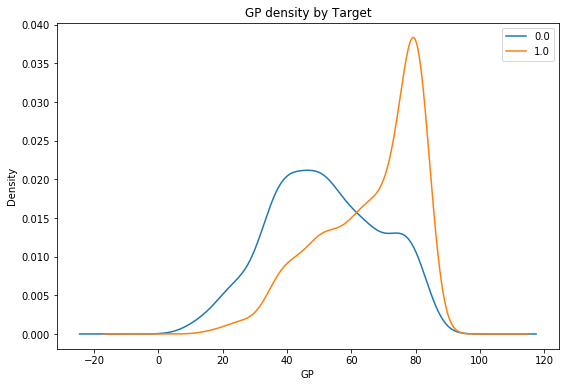

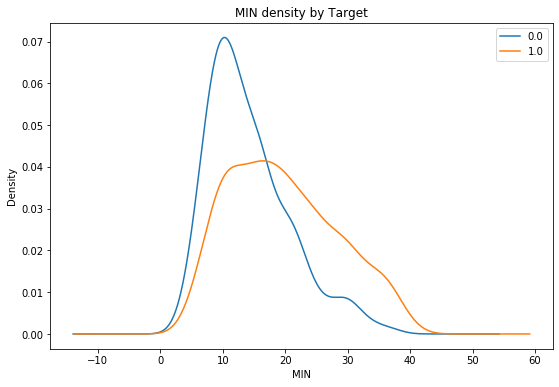

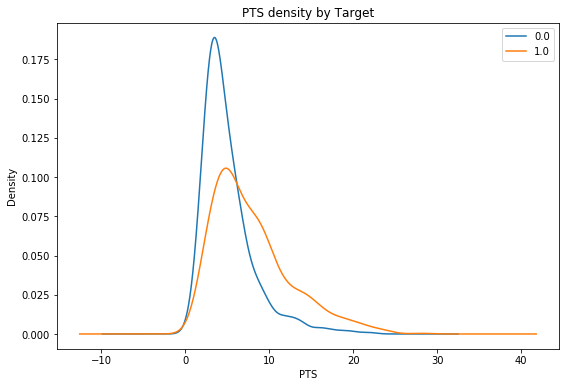

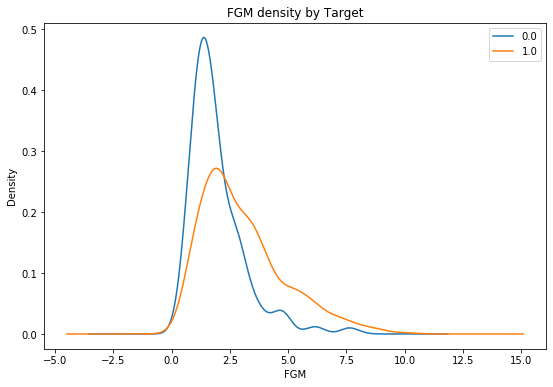

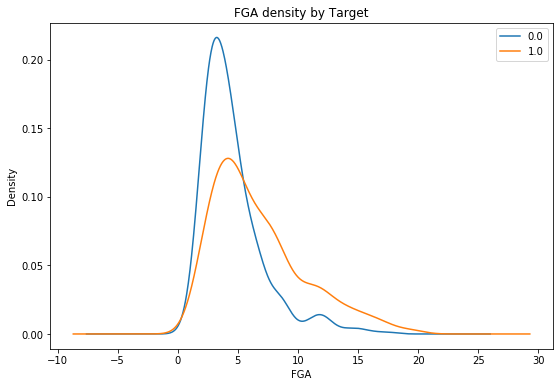

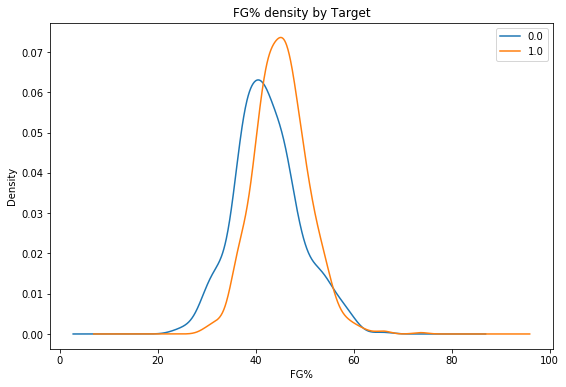

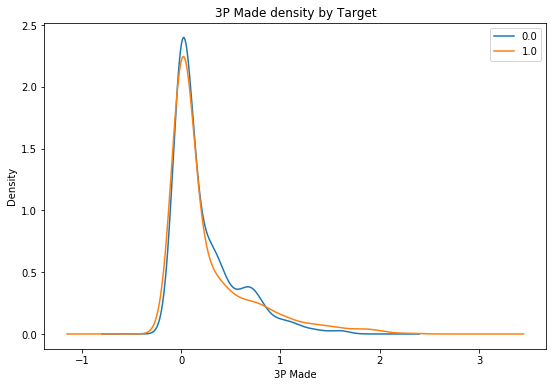

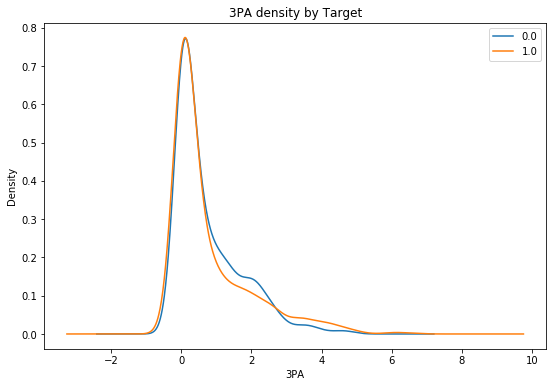

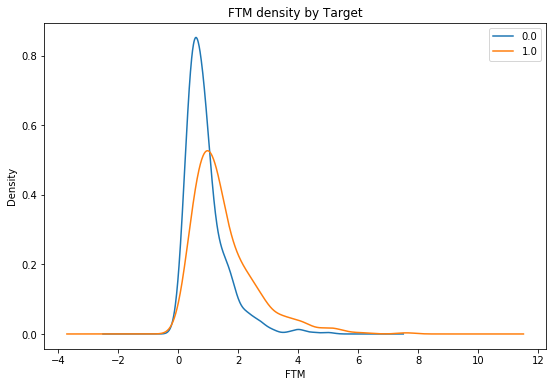

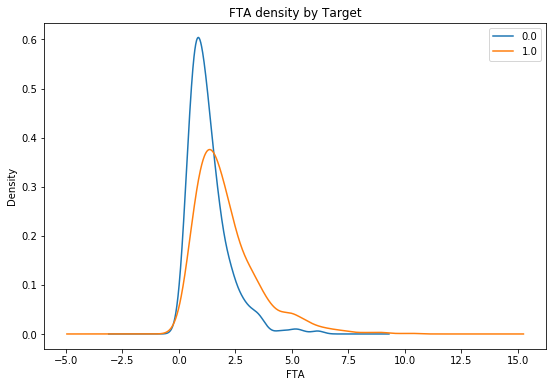

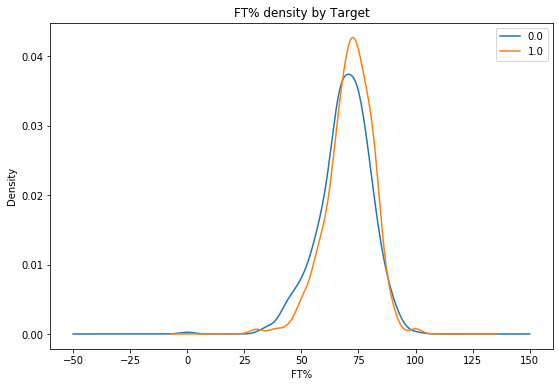

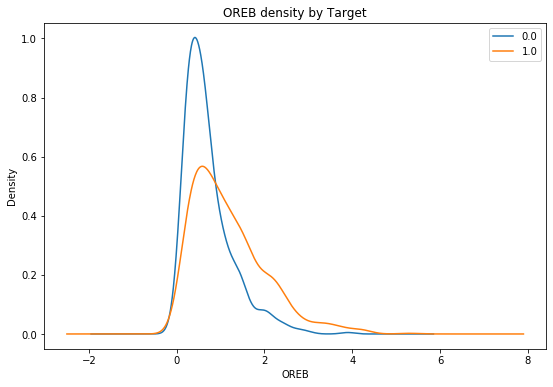

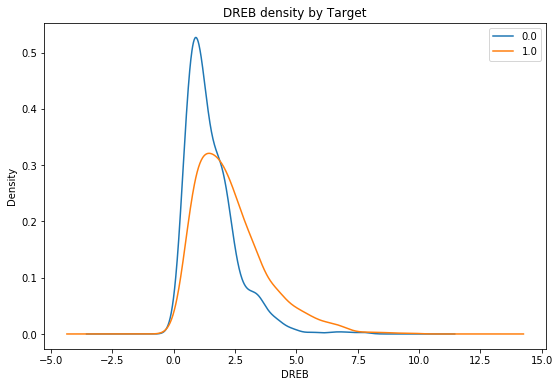

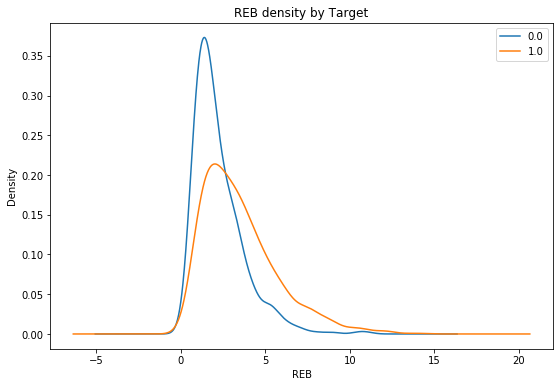

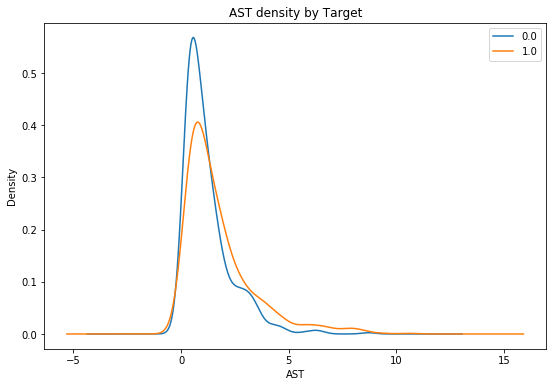

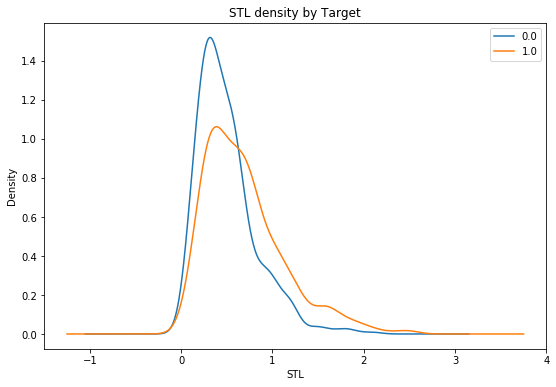

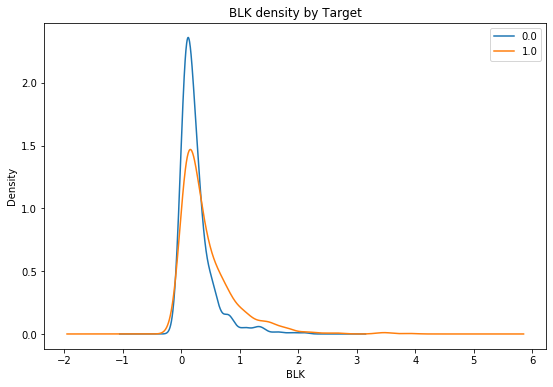

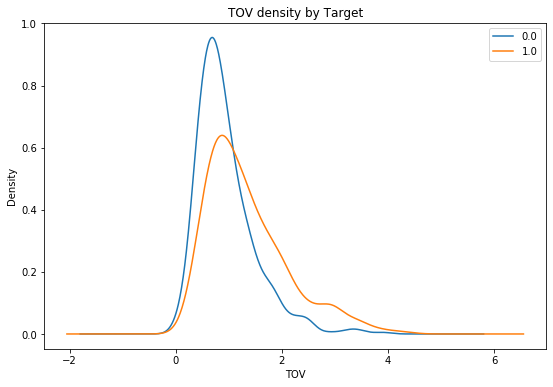

In [10]:
for col_ in df.drop(['Name', 'TARGET_5Yrs'], axis=1).columns:
    plt.figure(figsize=(9, 6))
    df.groupby('TARGET_5Yrs')[col_].plot(kind='kde')
    plt.legend()
    plt.title(str(col_) + ' density by Target')
    plt.xlabel(str(col_))
    plt.ylabel('Density')
    plt.show()

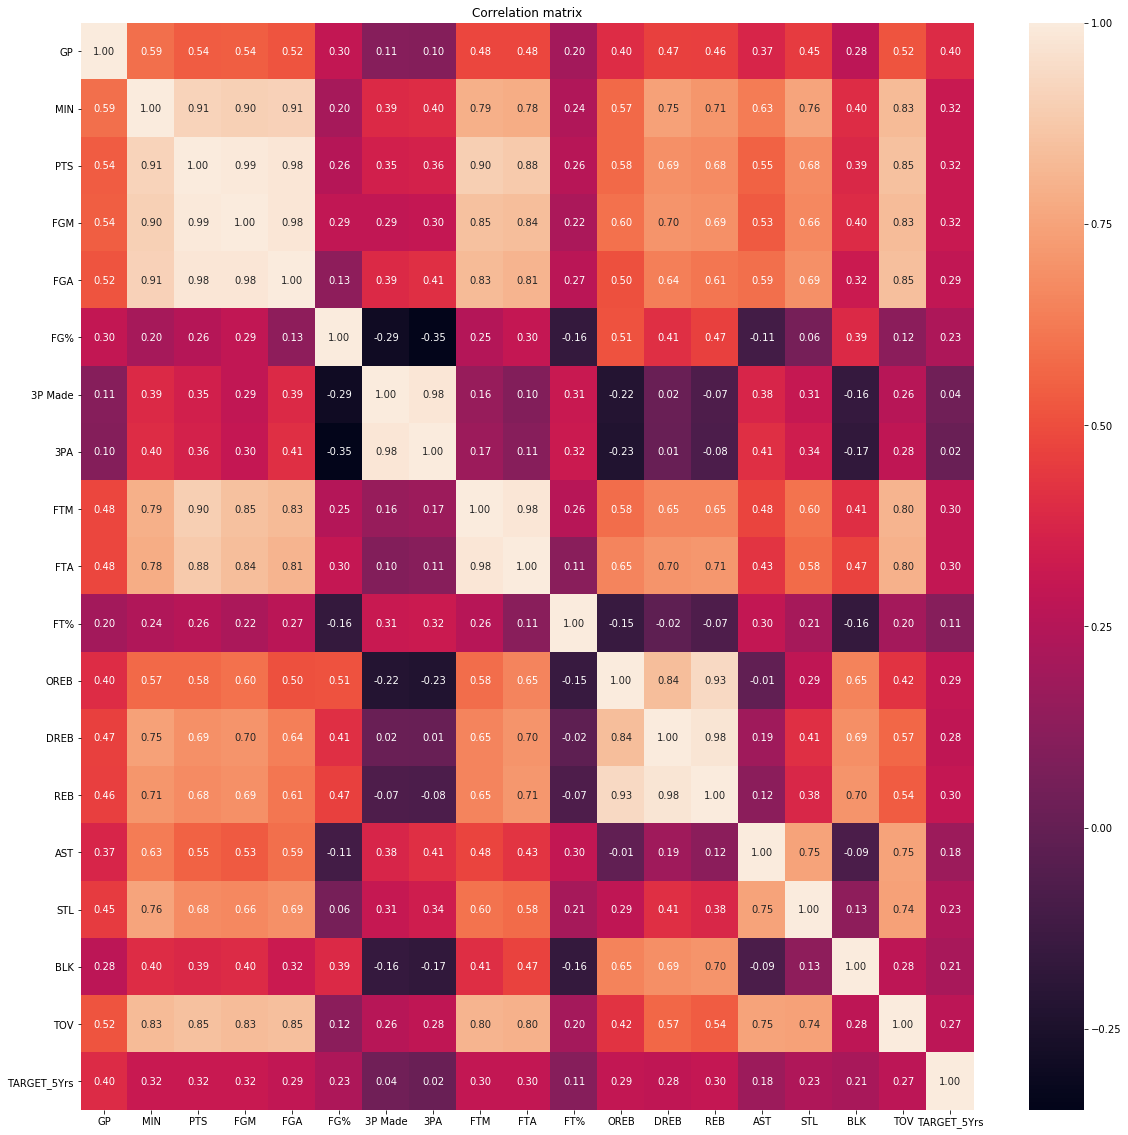

In [11]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.title('Correlation matrix')
plt.yticks(rotation=0)
plt.show()

## Prepare the data for a model of your choice, including mandatory preprocessing, and divide the data into a train and a test set. Explain your steps.

In [12]:
df.isna().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

The dataset doesn't have any missing value

I can drop a few columns that are redundant. For example, FGM and FGA are highly correlated with points (which makes sense because it's hard to score points without attempting and making field goals) and their information is a bit redundant with the ones given by PTS and FG%. \
On the same logic, FTM can be dropped, as well as DREB.

In [13]:
df.shape

(1340, 20)

In [14]:
df2 = df.drop(['Name', 'FGM', 'FGA', 'FTM', 'DREB'], axis=1)

In [15]:
df2.shape

(1340, 15)

## Divide your dataset to a train set and a test set

In [16]:
X = df2.drop('TARGET_5Yrs', axis=1)
y = df2['TARGET_5Yrs']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

We scale the data so measure units of features won't affect their weight

## Train a model of your choice (NOT the same model from Q1), and predict on the test set

In [19]:
svm = SVC(kernel='rbf', degree=2, C=1.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

## Choose two metrics of evaluation, and evaluate your model. 
* Exlain the difference between the metrics
* Explain the advantages and disadvantages of each metric that your chose
* Present the result of prediction for both the train and test sets

In [20]:
print(confusion_matrix(y_test, y_pred))

[[ 55  42]
 [ 36 135]]


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.57      0.59        97
         1.0       0.76      0.79      0.78       171

    accuracy                           0.71       268
   macro avg       0.68      0.68      0.68       268
weighted avg       0.71      0.71      0.71       268



In [22]:
print('Accuracy is: {}'.format(accuracy_score(y_test, y_pred)))
print('Recall is: {}'.format(recall_score(y_test, y_pred)))

Accuracy is: 0.7089552238805971
Recall is: 0.7894736842105263


I chose those two metrics to show that our model is pretty good to predict positive cases (players that are going to play at least 5 seasons in the NBA), but significantly less for negative cases. We can see that because our accuracy (fraction of correctly predicted instances) is significantly lower than our recall (fraction of positive examples correctly predicted as positive).

Accuracy can be good to give us an overall idea of the performance of our model. But it can be very misleading, for example if we have unbalanced dataset, because our model could be very good to predict one class more represented but bad for smaller one, and our accuracy would still be good.

The advantages of recall is that it can give us a good idea about our model's ability to predict positive cases. Nevertheless, depending on the balance of the dataset, it can mislead us. For example, if 90% of our dataset is truly positive, then a recall of 0.80 would be bad, even if it looks good in absolute. 

In [23]:
pred_train = svm.predict(X_train)

In [24]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.68      0.60      0.64       412
         1.0       0.77      0.82      0.79       660

    accuracy                           0.74      1072
   macro avg       0.72      0.71      0.71      1072
weighted avg       0.73      0.74      0.73      1072



Classification by the model over the train set is better than on the test set, but not by far. Our model is clearly not overfitted.

## Write a Cross-Validation class from scratch

* The class should get a `k` for no. of k-folds as input
* The class should contain a method that gets a dataset and creates the `k` splits to train and test.
* The class should contain a method that will use the model that you chose in the previous clauses, and run that model with one fold (the model should train on the train set and return a prediction vector for the test set)
* The class should have a method that trains in cross-validation and returns the score of the best model (1 of the metrics you chose in previous clauses)

In [25]:
class Kfold:
    def __init__(self, n_folds=5):
        self.n_folds = n_folds
    def split(self, X):
        """Return a list (of size n_folds) of tuples of the form (indexes for train set, indexes for test set)"""
        number_folds = self.n_folds
        data_size = len(X)
        len_ = int(data_size / number_folds)
        index_ = np.arange(data_size)
        split_indexes = []
        
        for i in range(number_folds):
            i1 = i * len_
            i2 = (i + 1) * len_
            test_indexes = index_[i1: i2]
            train_indexes = np.concatenate((index_[:i1], index_[i2:]))
            split_indexes.append((train_indexes, test_indexes))
        return split_indexes
    
    def run_once(self, model, X, y, train_index, test_index):
        X = X.to_numpy()
        model.fit(X[train_index], y[train_index])
        return model.predict(X[test_index])
    
    def cross_val(self, model, X, y):
        number_folds = self.n_folds
        split_indexes = self.split(X)
        scores_recall = []
        for i in range(number_folds):
            train_index = split_indexes[i][0]
            test_index = split_indexes[i][1]
            y_pred = self.run_once(model, X, y, train_index, test_index)
            scores_recall.append(recall_score(y[test_index], y_pred))
        return np.mean(scores_recall)

## Train a model, using the Cross-Validation class you have built

In [26]:
svm = SVC(kernel='rbf', degree=2, C=1.0)
kf = Kfold(6)
print('Recall with cross-validation is: {}'.format(kf.cross_val(svm, X, y)))

Recall with cross-validation is: 0.8545259509361727


## compare the results of the two models (with and without cross validation) - what are your conclusions?

Using cross-validation, we improved recall, which means the prediction of players who will have a career longer than 5 years. \
This probably means that the section of the data we used at first for our model was not the best for our model to perform, and cross-validation gave the model better sections of the data.

## What is the baseline of this model? (Compute it and explain the choice), and compare it to your best model

A baseline model here would be to assign randomly instances in classes based on classes repartitions in our train set. 

In [27]:
prob_class1 = y_train.mean()
prob_class0 = 1 - prob_class1

In [28]:
bernoulli_pred = np.random.binomial(1, prob_class1, size=len(y_test))

In [29]:
print(confusion_matrix(y_test, bernoulli_pred))

[[ 35  62]
 [ 68 103]]


In [30]:
print(classification_report(y_test, bernoulli_pred))

              precision    recall  f1-score   support

         0.0       0.34      0.36      0.35        97
         1.0       0.62      0.60      0.61       171

    accuracy                           0.51       268
   macro avg       0.48      0.48      0.48       268
weighted avg       0.52      0.51      0.52       268



In [31]:
print('Recall with baseline model is: {}'.format(recall_score(y_test, bernoulli_pred)))

Recall with baseline model is: 0.6023391812865497


Our best model is better than the baseline model, which is a relief.